ใน ep นี้เราจะมาเรียนรู้เทคนิคในการวิเคราะห์สิ่งใกล้เคียง Proximity Analysis เช่น

* วัดระยะทาง ระหว่าง 2 จุด บนแผนที่
* เลือกจุดที่อยู่ในรัศมีที่กำหนด


# 0. Install

เราจะต้อง Install kaggle เพื่อ Download Dataset, geopandas เพื่อใช้ในการวิเคราะห์ข้อมูล geospatial, folium เพื่อแสดงแผ่นที่ (ถ้ายังไม่ได้ Install ให้ uncomment)

In [0]:
# ! pip install geopandas
# ! pip install git+https://github.com/python-visualization/folium
# ! pip install kaggle --upgrade

# 1. Import Library

Import folium Library เพื่อใช้ในการพล็อตแผนที่แบบ Interactive

In [0]:
import pandas as pd
import geopandas as gpd

import folium
from folium import *
from folium.plugins import *

import os
from pathlib import Path

ประกาศฟังก์ชันในการแสดงแผนที่โดยใช้ HTML iframe แต่ Colab ไม่ Support iframe เราจะ return Map ออกไปเลย

In [0]:
from IPython.display import IFrame, HTML

def embed_map(m, file_name):    
    m.save(file_name)

    # # VM
    # return IFrame(src=file_name, width='100%', height='500px')

    # Colab
    return m

# 2. เตรียม Path สำหรับดาวน์โหลดข้อมูล

กำหนด path ของ Config File และ Dataset ว่าจะอยู่ใน Google Drive ถ้าเราใช้ Google Colab หรือ อยู่ใน HOME ถ้าเราใช้ VM ธรรมดา และกำหนด Environment Variable ไปยังโฟลเดอร์ที่เก็บ kaggle.json

ในกรณีใช้ Colab ให้ Mount Google Drive เพื่อดึง Config File มาจาก Google Drive ส่วนตัวของเรา เมื่อเรารัน Cell ด้านล่างจะมีลิงค์ปรากฎขึ้นมาให้เรา Login กด Approve แล้ว Copy Authorization Code มาใส่ในช่องด้านล่าง แล้วกด Enter

In [0]:
dataset = 'alexisbcook/geospatial-learn-course-data'

# Google Colab
config_path = Path('/content/drive')
data_path = Path('/content/datasets/')/dataset
from google.colab import drive
drive.mount(str(config_path))
os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/My Drive/.kaggle"

## VM
# config_path = Path(os.getenv("HOME"))
# data_path = config_path/"datasets"/dataset
# data_path.mkdir(parents=True, exist_ok=True)
# os.environ['KAGGLE_CONFIG_DIR'] = f"{config_path}/.kaggle"

# 3. Dataset

ในเคสนี้ เราจะสมมติตัวเองเป็นนักสิ่งแวดล้อม วิเคราะห์คุณภาพอากาศ, สารเคมี, ฝุ่น PM 2.5, etc. ในเมืองฟิลาเดลเฟีย รัฐเพนซิลเวเนีย ประเทศสหรัฐอเมริกา

Dataset เราจะดึงจาก Kaggle วิธี Download kaggle.json ให้ดูจาก ep ที่แล้ว

เมื่อได้ kaggle.json มาแล้ว ในกรณีใช้ Google Colab ให้นำมาใส่ไว้ในโฟลเดอร์ My Drive/.kaggle ใน Google Drive ของเรา เป็น My Drive/.kaggle/kaggle.json ถ้าใช้ VM ให้ใส่ใน HOME/.kaggle/

สั่งดาวน์โหลด Dataset จาก Kaggle พร้อมทั้ง unzip ไว้ใน data_path

In [0]:
!kaggle datasets download {dataset} -p "{data_path}" --unzip

# 4. Data

## 4.1 การปล่อยสารพิษ

โหลดข้อมูลการปล่อยสารพิษ ในเมืองฟิลาเดลเฟีย จากหน่วยงาน US Environmental Protection Agency (EPA) ขึ้นมา

In [93]:
releases = gpd.read_file(data_path/"toxic_release_pennsylvania/toxic_release_pennsylvania/toxic_release_pennsylvania.shp") 
releases.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [94]:
releases.shape

(4663, 10)

In [0]:
# Create a base map
m_1 = folium.Map(location=[39.9526,-75.1652], zoom_start=11)

# Add a heatmap to the base map
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=20).add_to(m_1)

# Display the map
embed_map(m_1, '25g-m_1.html')

<!--- สำหรับแสดงบนเว็บไซต์ -->
<iframe width="100%" height="640" src="https://www.bualabs.com/wp-content/uploads/2019/11/25g-m_1.html" frameborder="0" allowfullscreen></iframe>

ใน Dataset ของเรายังมีข้อมูลที่น่าสนใจอีกอย่าง คือ ข้อมูลจากสถานีวัดคุณภาพอากาศ ในเมืองเดียวกัน

In [96]:
stations = gpd.read_file(data_path/"PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")
stations.head()

,SITE_NAME,ADDRESS,BLACK_CARB,ULTRAFINE_,CO,SO2,OZONE,NO2,NOY_NO,PM10,PM2_5,SPECIATED_,PM_COURSE,CARBONYLS,PAMS_VOC,TSP_11101,TSP_METALS,TSP_LEAD,TOXICS_TO1,MET,COMMUNITY_,LATITUDE,LONGITUDE,geometry
0,LAB,1501 East Lycoming Avenue,N,N,Y,N,Y,Y,Y,N,Y,N,N,Y,Y,N,Y,N,y,N,N,40.008606,-75.097624,POINT (2711384.641 257149.310)
1,ROX,Eva and Dearnley Streets,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,Y,N,N,40.050461,-75.236966,POINT (2671934.290 271248.900)
2,NEA,Grant Avenue and Ashton Street,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,40.072073,-75.013128,POINT (2734326.638 280980.247)
3,CHS,500 South Broad Street,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,Y,N,N,39.944510,-75.165442,POINT (2693078.580 233247.101)
4,NEW,2861 Lewis Street,N,N,Y,Y,Y,N,Y,Y,Y,Y,Y,N,N,Y,N,Y,N,Y,N,39.991688,-75.080378,POINT (2716399.773 251134.976)


In [97]:
stations.shape

(12, 24)

In [0]:
# Create a base map
m_2 = folium.Map(location=[39.9526,-75.1652], zoom_start=11)

# Add a heatmap to the base map
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=20).add_to(m_2)

# Add points to the map
for idx, row in stations.iterrows():    
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m_2)

# Display the map
embed_map(m_2, '25g-m_2.html')

<!--- สำหรับแสดงบนเว็บไซต์ -->
<iframe width="100%" height="640" src="https://www.bualabs.com/wp-content/uploads/2019/11/25g-m_2.html" frameborder="0" allowfullscreen></iframe>

# 5. วัดระยะทาง ข้อมูลภูมิศาสตร์

ก่อนวัดระยะทาง เราต้องเช็คก่อนว่าข้อมูลอยู่ใน [CRS](https://www.bualabs.com/archives/2594/what-is-coordinate-reference-system-crs-what-is-map-projection-teach-geopandas-convert-crs-geospatial-data-geospatial-ep-2/) เดียวกัน ไม่งั้นจะเปรียบเทียบกันไม่ได้

In [99]:
print(stations.crs)
print(releases.crs)

{'init': 'epsg:2272'}
{'init': 'epsg:2272'}


และเราต้องเช็คอีกว่า CRS นั้น ใช้หน่วยวัดเป็นระบบอะไร ในคสนี้ epsg 2272 มีหน่วยวัดระยะทาง เป็นฟุต (Feet) ตามข้อมูลด้านล่าง รายละเอียดเพิ่มเติมในหัวข้อ Credit

* Unit: US survey foot
* Geodetic CRS: NAD83
* Datum: North American Datum 1983
* Ellipsoid: GRS 1980
* Prime meridian: Greenwich
* Data source: OGP
* Revision date: 2007-01-19
* Scope: Large and medium scale topographic mapping and engineering survey.
* Method: Geocentric translations (geog2D domain)
* Coordinate system: Cartesian 2D CS. Axes: easting, northing (X,Y). Orientations: east, north. UoM: ftUS.

วัดระยะทางจากจุดปล่อยสารพิษ ครั้งล่าสุด ไปยังสถานีตรวจสอบสภาพอากาศ ทั้ง 12 สถานี หน่วยเป็นฟุต

In [100]:
# Select one release incident in particular
recent_release = releases.iloc[4662]

# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)
distances

0     24818.534592
1     38081.995399
2     57888.980440
3      6662.974862
4     25468.457860
5     16031.056920
6      5557.991363
7     32605.236812
8     60255.213054
9     19236.322478
10    15645.975503
11     5175.201869
dtype: float64

In [0]:
# Create a base map
m_3 = folium.Map(location=[39.9526,-75.1652], zoom_start=11)

# Add a heatmap to the base map
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=20).add_to(m_3)

# Add points to the map
for idx, row in stations.iterrows():    
    Marker([row['LATITUDE'], row['LONGITUDE']], tooltip=row['SITE_NAME']).add_to(m_3)

CircleMarker(
    location=[recent_release['LATITUDE'], recent_release['LONGITUDE']], 
    color='red', 
    fillcolor='red', fill=True, 
    radius=100).add_to(m_3)

# Display the map
embed_map(m_3, '25g-m_3.html')

<!--- สำหรับแสดงบนเว็บไซต์ -->
<iframe width="100%" height="640" src="https://www.bualabs.com/wp-content/uploads/2019/11/25g-m_3.html" frameborder="0" allowfullscreen></iframe>

คำนวนหา ระยะทางเฉลี่ยจาก จุดปล่อยสารพิษ ครั้งล่าสุด ไปยังสถานีตรวจสอบสภาพอากาศ ทั้ง 12 สถานี

In [102]:
print(f'Mean distance to monitoring stations: {distances.mean()} feet')

Mean distance to monitoring stations: 25618.99509593599 feet


หาสถานีตรวจวัดสภาพอากาศ ที่ใกล้ที่สุด กับ จุดปล่อยสารพิษครั้งล่าสุด

In [103]:
print(f'Closest monitoring station ({distances.min()} feet):')
print(stations.iloc[distances.idxmin()][["SITE_NAME", "ADDRESS", "LATITUDE", "LONGITUDE"]])

Closest monitoring station (5175.201869156377 feet):
SITE_NAME             VGR
ADDRESS      6th and Arch
LATITUDE          39.9528
LONGITUDE        -75.1499
Name: 11, dtype: object


# 6. สร้าง Buffer

แทนที่เราจะต้องพล็อตแผนที่แล้วมองหา หรือคำนวนระยะทางระหว่างจุดปล่อย และสถานีตรวจวัด ทีละคู่ ๆ เราสามารถสร้าง Buffer รอบจุดที่เราต้องการได้ เช่น เราจะสร้าง Buffer ระยะทาง 2 ไมล์ รอบ ๆ ทุก ๆ สถานีตรวจวัด 

In [104]:
two_mile_buffer = stations.geometry.buffer(2*5280)
two_mile_buffer.head()

0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

เราจะเห็นวงกลมสีน้ำเงินขึ้นมา รัศมี 2 ไมล์ (2 x 5280 ฟุต) โดยจุดศูนย์กลางอยู่ที่สถานีตรวจวัดอากาศ แต่ละสถานี

In [0]:
# Create map with release incidents and monitoring stations
m_4 = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=20).add_to(m_4)
for idx, row in stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m_4)
    
# Plot each polygon on the map
GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(m_4)

# Show the map
embed_map(m_4, '25g-m_4.html')

<!--- สำหรับแสดงบนเว็บไซต์ -->
<iframe width="100%" height="640" src="https://www.bualabs.com/wp-content/uploads/2019/11/25g-m_4.html" frameborder="0" allowfullscreen></iframe>

# 7. ใช้งาน Buffer

เราสามารถรวม Buffer ด้านบน เข้าเป็น Shape MultiPolygon เดียว เพื่อให้ง่ายต่อการนำไปใช้งานต่อไป

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


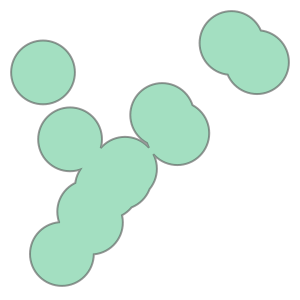

In [106]:
# Turn group of polygons into single multipolygon
my_union = two_mile_buffer.geometry.unary_union
print('Type:', type(my_union))

# Show the MultiPolygon object
my_union

เราสามารถเช็คง่าย ๆ ว่าการปล่อยสารพิษครั้งล่าสุด อยู่ในรัศมี 2 ไมล์จาก 12 สถานีตรวจวัด หรือไม่ ด้วย MultiPolygon.contains()

In [107]:
# The closest station is less than two miles away
my_union.contains(recent_release.geometry)

True

การปล่อยสารพิษ ครั้งที่ 358 อยู่นอกรัศมี

In [108]:
# The closest station is more than two miles away
my_union.contains(releases.iloc[358].geometry)

False

# Credit

* https://www.kaggle.com/alexisbcook/proximity-analysis
* https://epsg.io/2272
* https://www.bualabs.com/archives/2785/find-next-starbucks-reserve-roastery-new-branch-store-location-big-data-analyst-demography-geography-geospatial-ep-6/
* http://geopandas.org/reference.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
* https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays
* https://epsg.io/4326
* http://geopandas.org/geometric_manipulations.html